# Practical Time Series - Lecture 1
* Components of time series
* Basic Visualization techniques
* Handling missing data
* Time Series Decomposition

## Imports and steup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Creating synthetic time series components 
- Get to know time indexing with datetime module

In [3]:
# Creating sintetic time series with pandas
# Time index array
t = np.arange(180) # Generates an array of 180 time stamps (0.5 year)
# Initialize DataFrame
df = pd.DataFrame(index=t)

# set the index as a datetime object with daily frequency starting on January 1, 2024
df.index = pd.to_datetime(df.index, unit='D', origin=pd.Timestamp('2024-01-01')) 

# Set the parameters for the time series components using the specified formulations
# Linear trend component
df['Trend'] = t * 0.1 # Linear trend component

# Seasonal component with a 30 days cycle and amplitude of 10
df['Seasonality'] = 10 * np.sin(2 * np.pi * t / 30) 

# Weekly ciclical component, not sinusoidal  with higher values on weekends
# find days friday and saturday and sunday
weekend = df.index.weekday.isin([4, 5, 6])
# Create a weekly cycle component random value 0-2 on week days and 4-8 on weekends
df['Weekly'] = np.where(weekend, np.random.uniform(4, 8, size=t.size), np.random.uniform(0, 2, size=t.size))

# Random noise component with normal distribution and standard deviation of 3
df['Noise'] = np.random.normal(0, 1, size=t.size) 



df.head()

,Trend,Seasonality,Weekly,Noise
2024-01-01,0.0,0.000000,0.508786,-0.366540
2024-01-02,0.1,2.079117,1.806591,0.747794
2024-01-03,0.2,4.067366,1.095726,0.714617
2024-01-04,0.3,5.877853,1.975100,0.335870
2024-01-05,0.4,7.431448,4.675010,-0.059466


### Plot Components

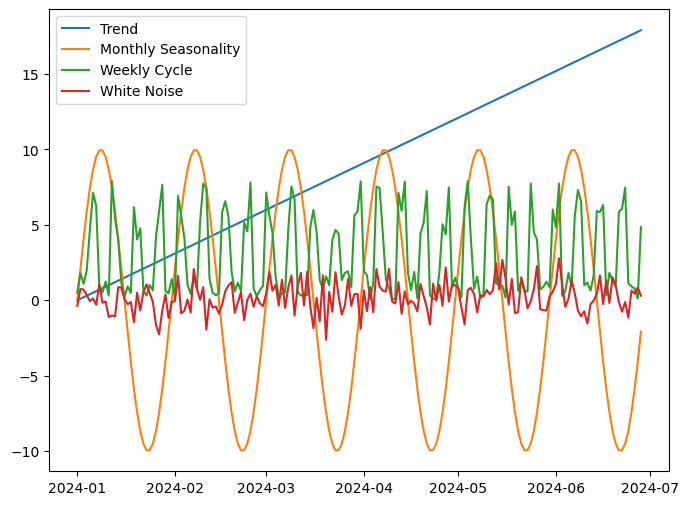

In [4]:
# Plot the time series components
plt.figure(figsize=(8, 6))
# Plot the trend component
plt.plot(df.index, df['Trend'], label='Trend')
# Plot the seasonal component
plt.plot(df.index, df['Seasonality'], label= 'Monthly Seasonality')
# Plot the weekly component
plt.plot(df.index, df['Weekly'], label='Weekly Cycle')
# Plot the noise component
plt.plot(df.index, df['Noise'], label='White Noise')

plt.legend()
plt.show()


## Combine Components into Unified Time Series

In [5]:
# Create unified time series by adding all the components 
df['Time_Series'] = df['Trend'] + df['Seasonality'] + df['Weekly'] + df['Noise'] + 50 # Add 50 to make all values positive

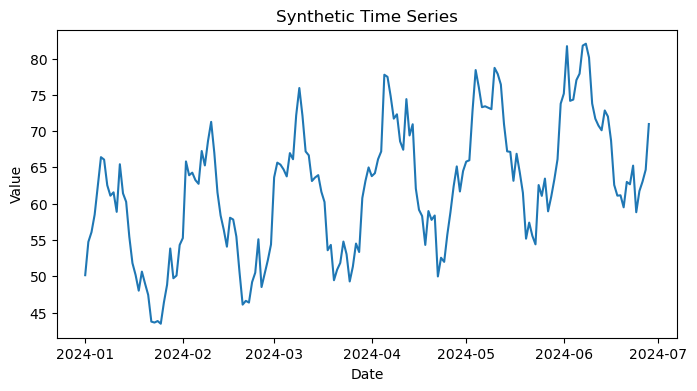

In [6]:
# Plot the unified time series  
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Time_Series'], label='Time Series')
plt.title('Synthetic Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

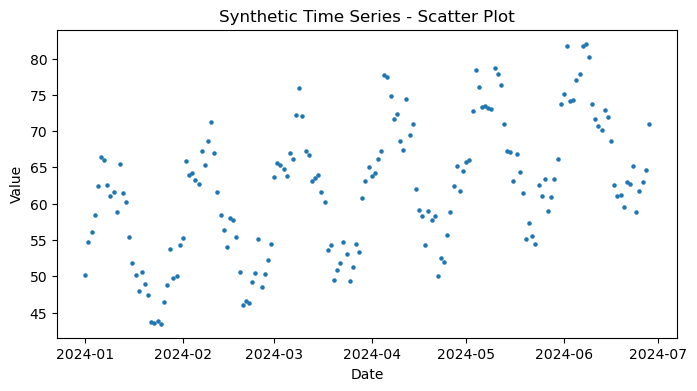

In [7]:
# Plot as scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['Time_Series'], label='Time Series', s=5) 
plt.title('Synthetic Time Series - Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



### Plotting Time Series with Interactive Visualization

In [8]:
import hvplot.pandas 
import hvplot as hv

In [9]:
df.plot(backend='hvplot', width=800, height=400, title='Synthetic Time Series', xlabel='Date', ylabel='Value', legend='top_left')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

##  Handle missing values 

### Loading Time Series 

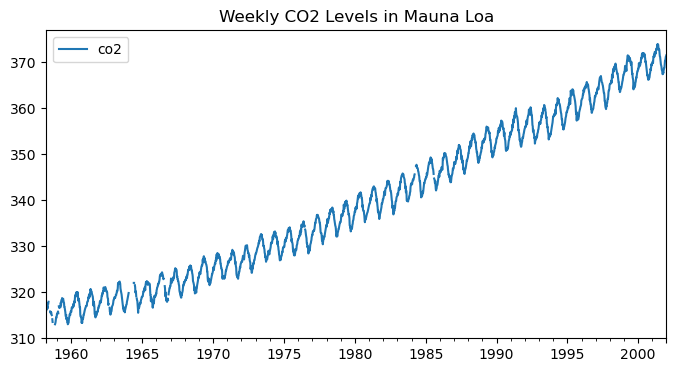

In [10]:
from statsmodels.datasets import co2 

# Load the dataset
co2_df = co2.load_pandas().data
# Plot the original data
co2_df.plot(title='Weekly CO2 Levels in Mauna Loa', figsize=(8, 4))
plt.show()


### Find Missing Values

1958-03-29    False
1958-04-05    False
1958-04-12    False
1958-04-19    False
1958-04-26    False
Freq: W-SAT, Name: co2, dtype: bool


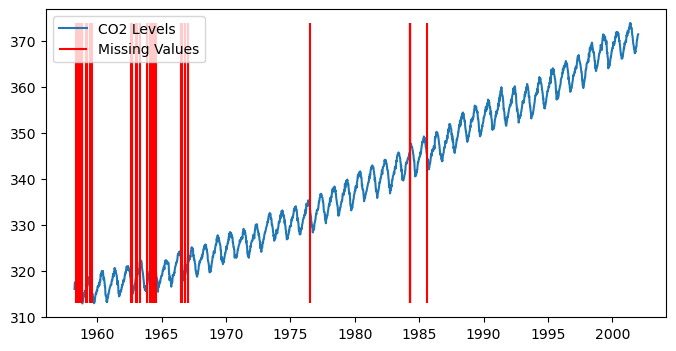

In [14]:
# Find the missing values
missing_values = co2_df['co2'].isnull()
print(missing_values.head())

# create the index of the missing values
missing_values_index = co2_df[missing_values].index

# plot the time series with the missing values
plt.figure(figsize=(8, 4))
plt.plot(co2_df['co2'], label='CO2 Levels')
# plot a black line at every missing value
plt.vlines(missing_values_index, co2_df['co2'].min(), co2_df['co2'].max(), color='red', label='Missing Values')
plt.legend()
plt.show()





#### Analyze missing values distribution

In [15]:
#print the number of missing_values dates per year
print('number of missing values per year:')
# Resample the missing values by year and sum the missing values, YE is the year end frequency
missing_values.resample('YE').sum() 

number of missing values per year:


1958-12-31    15
1959-12-31     4
1960-12-31     0
1961-12-31     0
1962-12-31     4
1963-12-31     3
1964-12-31    21
1965-12-31     0
1966-12-31     4
1967-12-31     2
1968-12-31     0
1969-12-31     0
1970-12-31     0
1971-12-31     0
1972-12-31     0
1973-12-31     0
1974-12-31     0
1975-12-31     0
1976-12-31     1
1977-12-31     0
1978-12-31     0
1979-12-31     0
1980-12-31     0
1981-12-31     0
1982-12-31     0
1983-12-31     0
1984-12-31     4
1985-12-31     1
1986-12-31     0
1987-12-31     0
1988-12-31     0
1989-12-31     0
1990-12-31     0
1991-12-31     0
1992-12-31     0
1993-12-31     0
1994-12-31     0
1995-12-31     0
1996-12-31     0
1997-12-31     0
1998-12-31     0
1999-12-31     0
2000-12-31     0
2001-12-31     0
Freq: YE-DEC, Name: co2, dtype: int64

#### Focus on 1962 to 1967 period

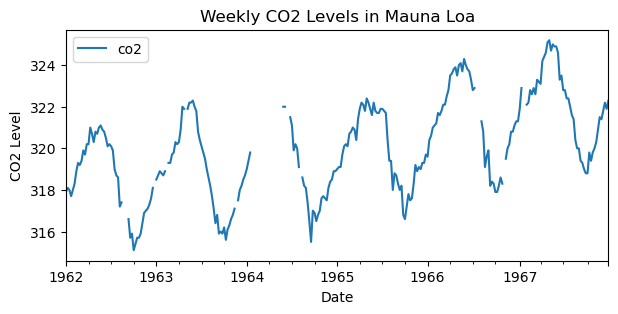

In [16]:
# Focus on 1962 to 1967 period
co2_62_67 = co2_df['1962-01-01':'1967-12-31']
# Plot the data
co2_62_67.plot(title='Weekly CO2 Levels in Mauna Loa', figsize=(7, 3))
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.show()

### Drop the missing values approach 

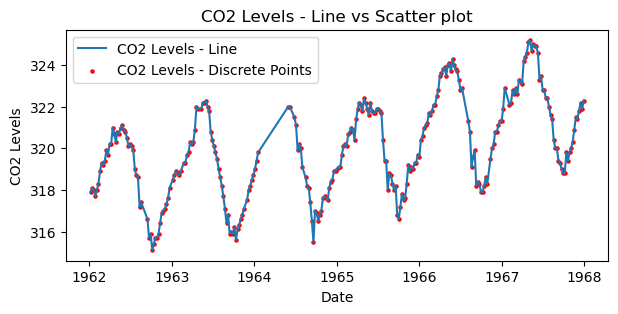

In [22]:
# Drop the missing values approach 
co2_62_67_dropna = co2_62_67.dropna()
# Plot the data with the date as x-axis
#co2_62_67_dropna.plot(title='CO2 Levels - Drop NaNs, Date index', figsize=(7, 3))
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_dropna['co2'], label='CO2 Levels - Line')
plt.scatter(co2_62_67_dropna.index, co2_62_67_dropna['co2'], color='red', s=5, label='CO2 Levels - Discrete Points')
plt.title('CO2 Levels - Line vs Scatter plot')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

### Present the "Real" data set after drop NaNs

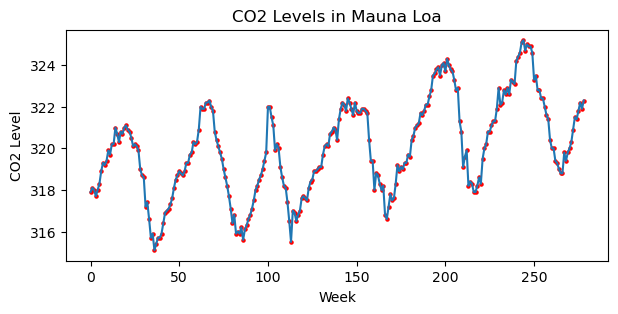

In [23]:
# Create a new df with running index as integer
co2_x_int= co2_62_67.reset_index()
# Drop the missing values in the co2_62_67_x
co2_x_dropna = co2_x_int.dropna()

# Reset the index
co2_x_dropna = co2_x_dropna.reset_index() 

# Plot the data without the missing dates with the running index as x-axis
plt.figure(figsize=(7, 3))
plt.plot(co2_x_dropna.index, co2_x_dropna['co2'])
plt.scatter(co2_x_dropna.index, co2_x_dropna['co2'], color='red', s=5)
plt.title('CO2 Levels in Mauna Loa')
plt.xlabel('Week')
plt.ylabel('CO2 Level')
plt.show()

### Forward and Backward feed approach

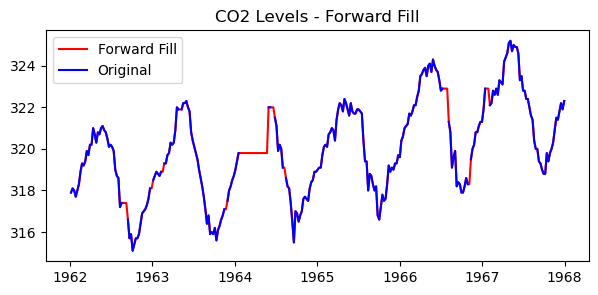

In [24]:
# Forward feed approach
co2_62_67_ffill = co2_62_67.fillna(method='ffill') # Forward fill the missing values
# Plot the data with forward fill
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_ffill.index, co2_62_67_ffill['co2'], color='red', label='Forward Fill')
plt.plot(co2_62_67['co2'], color='blue', label='Original')
plt.title('CO2 Levels - Forward Fill')
plt.legend()
plt.show()

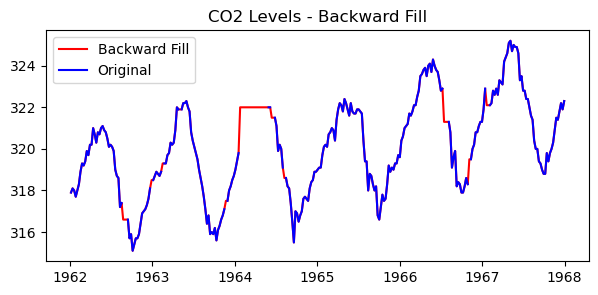

In [ ]:
# Backward feed approach
co2_62_67_bfill = co2_62_67.fillna(method='bfill') # Backward fill the missing values
# Plot the data with backward fill
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_bfill.index, co2_62_67_bfill['co2'], color='red', label='Backward Fill') 
plt.plot(co2_62_67['co2'], color='blue', label='Original')
plt.title('CO2 Levels - Backward Fill')
plt.legend()
plt.show()


### Interpolation Approach

#### Linear interpolation 

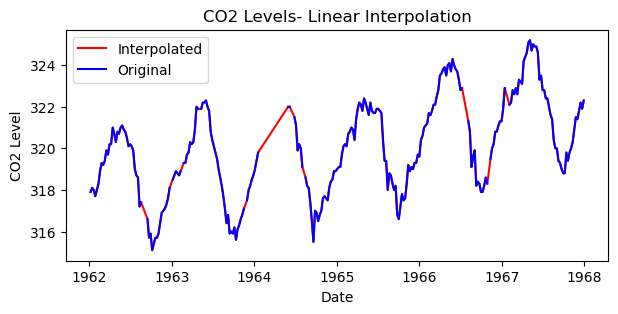

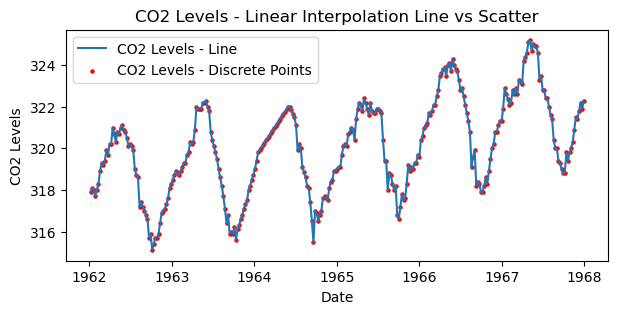

In [27]:
# Linear interpolation 
co2_62_67_interp = co2_62_67.interpolate(method='linear') # Linear interpolation
# Plot the data with interpolation
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_interp.index, co2_62_67_interp['co2'], label='Interpolated', color='red')
plt.plot(co2_62_67.index, co2_62_67['co2'], label='Original', color='blue')
plt.title('CO2 Levels- Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_interp['co2'], label='CO2 Levels - Line')
plt.scatter(co2_62_67_interp.index, co2_62_67_interp['co2'], color='red', s=5, label='CO2 Levels - Discrete Points')
plt.title('CO2 Levels - Linear Interpolation Line vs Scatter')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

#### Spline interpolation 

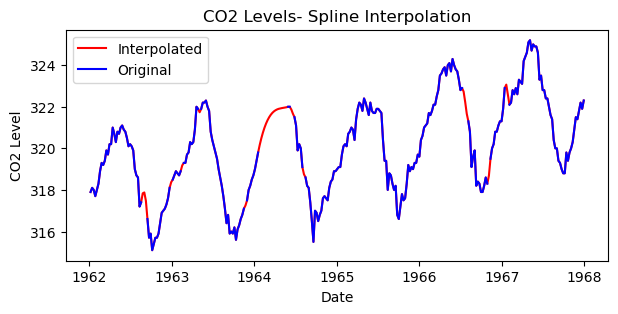

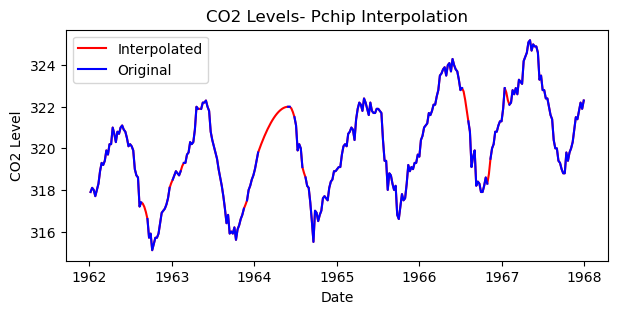

In [ ]:
# Polynomial interpolation 
co2_62_67_spline = co2_62_67.interpolate(method='polynomial', order=3) # Interpolate the missing values
# Plot the data with interpolation
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_spline.index, co2_62_67_spline['co2'], label='Interpolated', color='red')
plt.plot(co2_62_67.index, co2_62_67['co2'], label='Original', color='blue')
plt.title('CO2 Levels- Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()

# pchip interpolation
co2_62_67_pchip = co2_62_67.interpolate(method='pchip')
# Plot the data with interpolation
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_pchip.index, co2_62_67_pchip['co2'], label='Interpolated', color='red')
plt.plot(co2_62_67.index, co2_62_67['co2'], label='Original', color='blue')
plt.title('CO2 Levels- Pchip Interpolation')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()

## Time series Decomposition

### Moving average

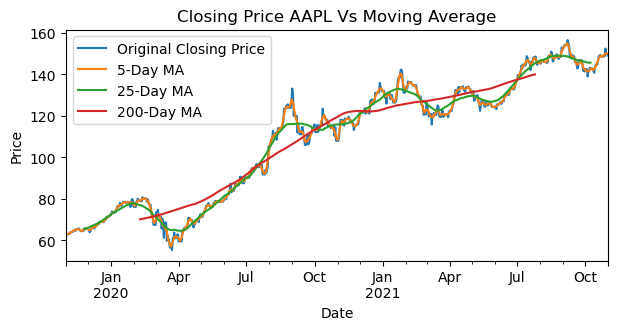

In [ ]:
AAPL= closing_price['AAPL']

# Calculate the centered moving average (CMA) with different time windows
MA_5d = AAPL.rolling(window=5, center=True).mean()
MA_50d = AAPL.rolling(window=50, center=True).mean()
MA_200d = AAPL.rolling(window=200, center=True).mean()

# Plotting the original closing prices and the moving average

plt.figure(figsize=(7, 3))
AAPL.plot(label='Original Closing Price')
MA_5d.plot(label='5-Day MA')
MA_25d.plot(label='25-Day MA')
MA_200d.plot(label='200-Day MA')
plt.title('Closing Price AAPL Vs Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

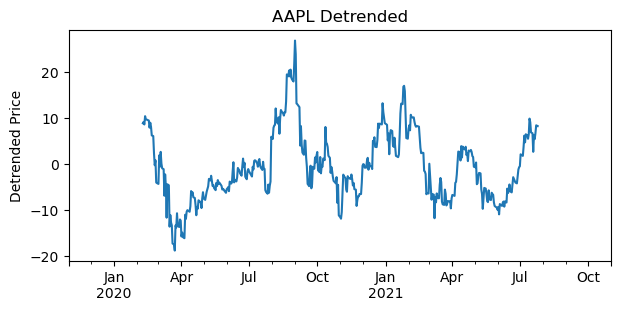

In [ ]:
# Detrend the data by subtracting the 200-day moving average
AAPL_detrended = AAPL - MA_200d
# plot the detrended data
AAPL_detrended.plot(figsize=(7, 3))
plt.title('AAPL Detrended')
plt.ylabel('Detrended Price')
plt.show()


### Moving Average to remove Trend and Seasonality

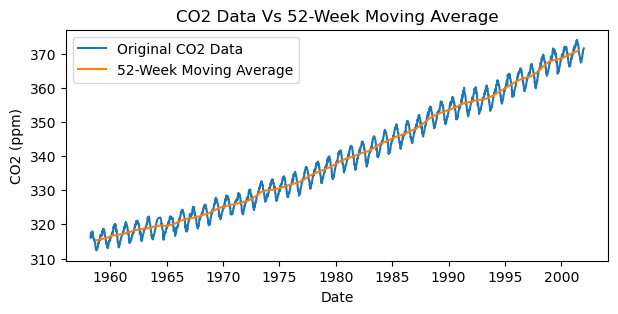

In [ ]:
# Moving Average to remove Seasonality

# Calculate the centered moving average of co2_df with a window of 52 weeks (1 year)
co2_MA = co2_df.rolling(window=52, center=True).mean()

# Plot the original data and the moving average on the same plot
plt.figure(figsize=(7, 3))
plt.plot(co2_df, label='Original CO2 Data')
plt.plot(co2_MA, label='52-Week Moving Average')
plt.title('CO2 Data Vs 52-Week Moving Average')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.show()


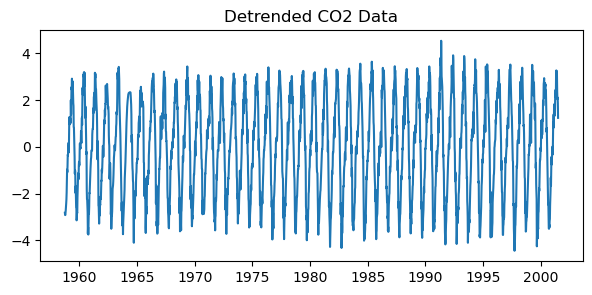

In [ ]:
# Subtract the moving average from the original data
co2_detrended = co2_df - co2_MA
# Plot the detrended data
plt.figure(figsize=(7, 3))
plt.plot(co2_detrended, label='Detrended CO2 Data')
plt.title('Detrended CO2 Data')
plt.show()

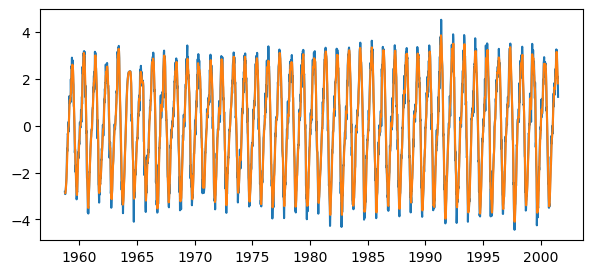

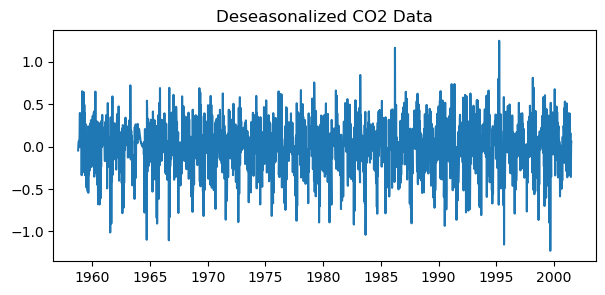

In [ ]:
# use moving average to remove seasonality from co2_detrended
co2_detrended_MA = co2_detrended.rolling(window=4, center=True).mean() # 4 weeks
# plot the detrended data and the moving average
plt.figure(figsize=(7, 3))
plt.plot(co2_detrended, label='Detrended CO2 Data')
plt.plot(co2_detrended_MA, label='52-Week Moving Average')
plt.show()

# Subtract the moving average from the detrended data
co2_deseasonalized = co2_detrended - co2_detrended_MA
# Plot the deseasonalized data
plt.figure(figsize=(7, 3))
plt.plot(co2_deseasonalized, label='Deseasonalized CO2 Data')
plt.title('Deseasonalized CO2 Data')
plt.show()

### Fitting regression curve and de-trending the data

#### Linear regression

Slope: 0.0015988486946560204
Intercept: 5.835749276070155
R^2: 0.8581457071824569


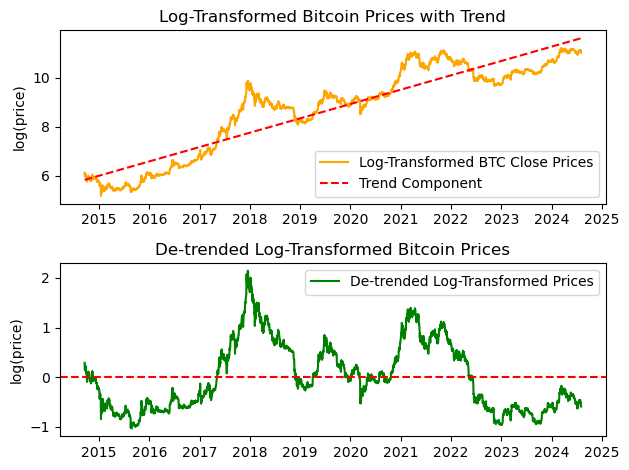

In [ ]:
# Generate a time index for the log-transformed data
time_index = np.arange(len(btc_close))
# Perform linear regression to find the trend and r^2 value
slope, intercept, r_value, p_value, std_err = stats.linregress(time_index, btc_log)
# Calculate the trend component
trend = slope * time_index + intercept
# De-trend the log-transformed data by subtracting the trend
btc_detrended = btc_log - trend

# print the slope and intercept
print('Slope:', slope)
print('Intercept:', intercept)
#print the r^2 value
print('R^2:', r_value**2)

# plot btc_log with the trend on the same plot
# plot btc_detrended on a separate plot
plt.subplot(2, 1, 1)
plt.plot(btc_log, label='Log-Transformed BTC Close Prices', color='orange')
plt.plot(btc_log.index,trend, label='Trend Component', color='red', linestyle='--')
plt.title('Log-Transformed Bitcoin Prices with Trend')
plt.ylabel('log(price)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(btc_detrended, label='De-trended Log-Transformed Prices', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('De-trended Log-Transformed Bitcoin Prices')
plt.ylabel('log(price)')
plt.legend()

plt.tight_layout()
plt.show()

#### Exponential regression

Fitted exponential parameters: a = 12395.188272623025, b = 0.0004731524699285554, c = -15462.467615310577
R^2 value: 0.6760022500253204


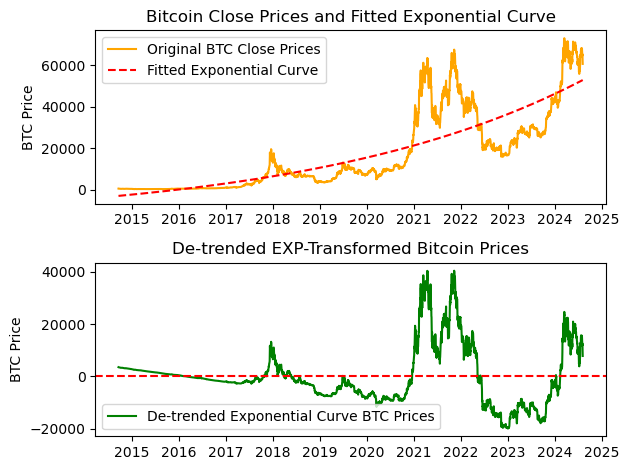

In [ ]:
# Define an exponential function to fit using curve_fit
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c
# Generate a time index for fitting
time_index = np.arange(len(btc_close))
# Perform the curve fitting
popt, pcov = curve_fit(exponential_func, time_index, btc_close, p0=(1, 0.0001, 1))
# Extract the parameters
a, b, c = popt

# Generate fitted exponential curve
btc_exp_fitted = exponential_func(time_index, a, b, c)
# get r^2 value
r_squared = np.corrcoef(btc_close, btc_exp_fitted)[0, 1]**2
#de-trend the data
btc_exp_detrended = btc_close - btc_exp_fitted

# Print the fitted parameters
print(f"Fitted exponential parameters: a = {a}, b = {b}, c = {c}")
print(f"R^2 value: {r_squared}")

# plot btc_log with the trend on the same plot
plt.subplot(2, 1, 1)
plt.plot(btc_close, label='Original BTC Close Prices', color='orange')
plt.plot(btc_close.index,btc_exp_fitted, label='Fitted Exponential Curve', color='red', linestyle='--')
plt.title('Bitcoin Close Prices and Fitted Exponential Curve')
plt.ylabel('BTC Price')
plt.legend()
# plot btc_detrended on a separate plot
plt.subplot(2, 1, 2)
plt.plot(btc_exp_detrended, label='De-trended Exponential Curve BTC Prices', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('De-trended EXP-Transformed Bitcoin Prices')
plt.ylabel('BTC Price')
plt.legend()
plt.tight_layout()
plt.show()


### Seasonal Decompose- Additive

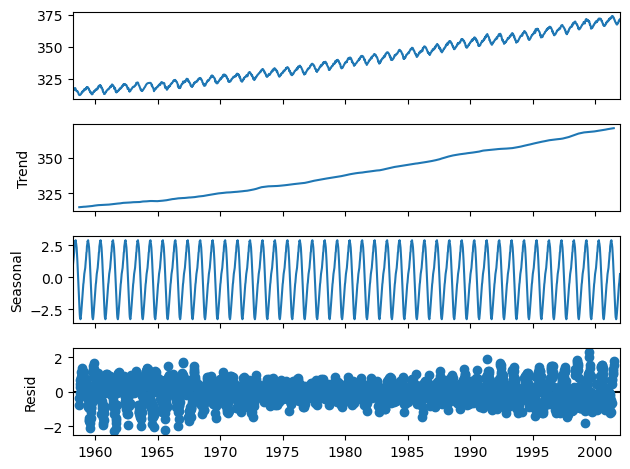

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# seasonal_decompose period parameter is required  for the seasonal decomposition to work properly (eg, 1 for annual, 12 for monthly, etc)
# However, when using pandas DataFrame or Series with a datetime index, the period parameter is inferred automatically from the datetime index frequency

co2_decomposition = seasonal_decompose(x=co2_df, model='additive') 

co2_trend = co2_decomposition.trend
co2_seasonal = co2_decomposition.seasonal
co2_residual = co2_decomposition.resid
# Plot the decomposed components
co2_decomposition.plot()
plt.show()

#### Examine the residuals 
NaN values in the begining and end because of the moving average opperation window size

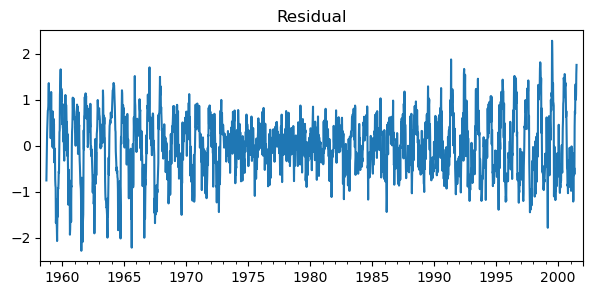

Number of NaN values:
52


In [ ]:
co2_residual.plot(figsize=(7, 3), title='Residual')
plt.show()

print('Number of NaN values:')
print(co2_residual.isnull().sum())

#co2_residual.head(27)


#### plot the last 200 values of the residual
Notice leftover seasonality

<Axes: title={'center': 'Residual'}>

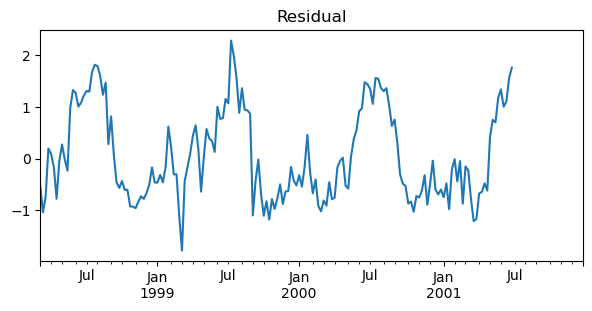

In [ ]:
# plot the last 200 values of the residual
co2_residual[-200:].plot(figsize=(7, 3), title='Residual')

### Seasonal Decompose- Multiplicative

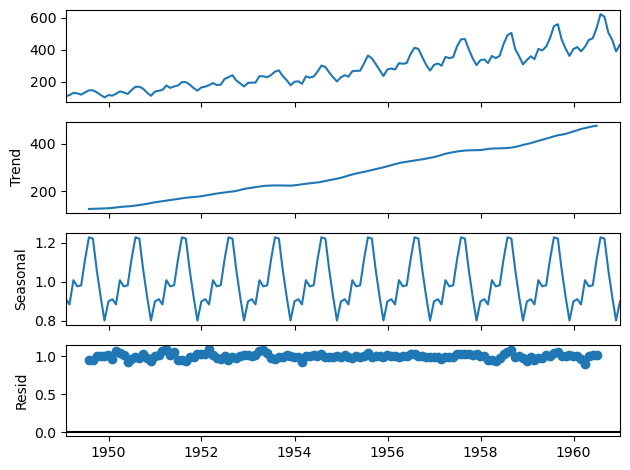

In [ ]:
airp_decomposed = seasonal_decompose(airp_df,model='multiplicative')
airp_decomposed.plot()
plt.show()

#### Examine the residuals 

<Axes: title={'center': 'Residual'}>

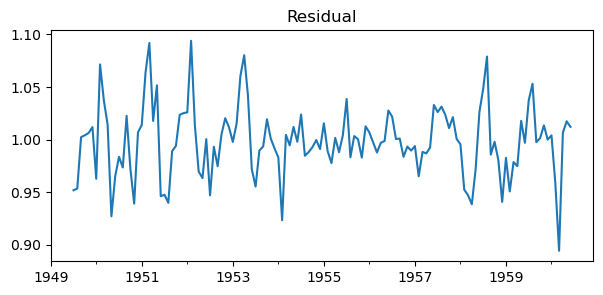

In [ ]:
# plot the last 200 values of the residual
airp_decomposed.resid[-200:].plot(figsize=(7, 3), title='Residual')

### STL Decompose
- the STL class requires to define the seasonal parameter, specifies the length of the smoother window
- can only take odd integer values greater than or equal to 7 to ensure that the smoothing window is wide enough to capture meaningful seasonal patterns

In [ ]:
from statsmodels.tsa.seasonal import  STL

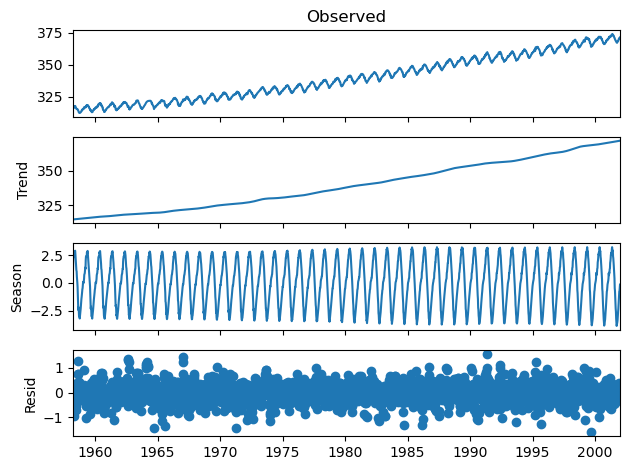

In [ ]:
# Apply STL decomposition
co2_stl = STL(co2_df, seasonal=25, robust=True).fit() # seasonal=53 for weekly data on a yearly cycle

# Plot the decomposed components
co2_stl.plot()
plt.show()


<Axes: title={'center': 'Residual'}>

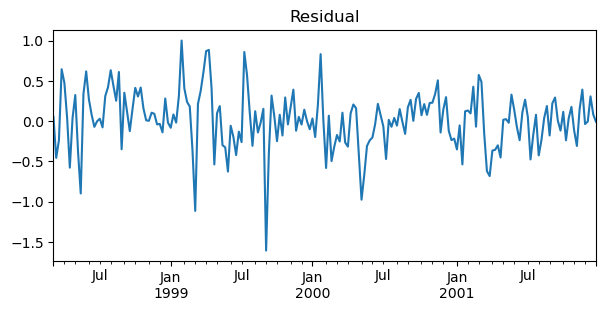

In [ ]:
# plot the last 200 values of the residual
co2_stl.resid[-200:].plot(figsize=(7, 3), title='Residual')